In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

keras.__version__

'2.8.0'

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


##### IMDB 데이터셋에서처럼 num_words=10000 매개변수는 데이터에서 가장 자주 등장하는 단어 10,000개로 제한

In [4]:
# 데이터 뉴스의 개수
len(train_data), len(test_data), len(train_data)+ len(test_data)

(8982, 2246, 11228)

In [5]:
# 46개의 토픽
print( np.unique(train_labels) )

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [6]:
# 2번째 뉴스 데이터 확인
print("데이터의 길이 : ", len(train_data[1]) )

# 처음부터 14개의 단어 인덱스 확인
print("데이터 내용(숫자) :", train_data[1][0:15] )

데이터의 길이 :  56
데이터 내용(숫자) : [1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198]


In [7]:
print( "자료형 : ", type(reuters) )
print( "reuters의 기능 리스트 : ", dir(reuters) )

자료형 :  <class 'module'>
reuters의 기능 리스트 :  ['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_remove_long_seq', 'get_file', 'get_word_index', 'json', 'keras_export', 'load_data', 'logging', 'np']


In [8]:
# reuters의 word의 index를 얻기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) 
                           for (key, value) in word_index.items()])

# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') 
                             for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [9]:
# 첫번째 뉴스 기사(숫자로 되어 있음)를 영문 매칭된 단어로 변경
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
train_labels[0:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
X_train = vectorize_sequences(train_data)

# 테스트 데이터 벡터 변환
X_test = vectorize_sequences(test_data)

print("변환 전 : ", train_data.shape, test_data.shape)
print("변환 후 : ", X_train.shape, X_test.shape)

변환 전 :  (8982,) (2246,)
변환 후 :  (8982, 10000) (2246, 10000)


In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 출력(레이블)을 벡터 변환(원핫)
# 훈련 레이블 벡터 변환
y_train = to_one_hot(train_labels)

# 테스트 레이블 벡터 변환
y_test = to_one_hot(test_labels)

print("변환 전 : ", train_labels.shape, test_labels.shape)
print("변환 후 : ", y_train.shape, y_test.shape)

변환 전 :  (8982,) (2246,)
변환 후 :  (8982, 46) (2246, 46)


In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
X_val = X_train[:1000]    # 0~8982 -> 0~1000개를 검증
partial_X_train = X_train[1000:] # 0~8982 -> 1000~끝까지 학습

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [16]:
# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 20) # 조기종료 콜백함수 정의

In [17]:
# early_stopping 를 이용하여 성능의 개선이 없을 시, 모델 학습을 중지
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/50
16/16 [==============================] - 4s 130ms/step - loss: 2.5619 - accuracy: 0.4769 - val_loss: 1.6997 - val_accuracy: 0.6490
Epoch 2/50
16/16 [==============================] - 1s 85ms/step - loss: 1.4025 - accuracy: 0.7114 - val_loss: 1.3001 - val_accuracy: 0.7140
Epoch 3/50
16/16 [==============================] - 1s 50ms/step - loss: 1.0535 - accuracy: 0.7740 - val_loss: 1.1297 - val_accuracy: 0.7500
Epoch 4/50
16/16 [==============================] - 1s 48ms/step - loss: 0.8281 - accuracy: 0.8224 - val_loss: 1.0235 - val_accuracy: 0.7820
Epoch 5/50
16/16 [==============================] - 1s 75ms/step - loss: 0.6567 - accuracy: 0.8632 - val_loss: 0.9731 - val_accuracy: 0.7900
Epoch 6/50
16/16 [==============================] - 2s 98ms/step - loss: 0.5252 - accuracy: 0.8938 - val_loss: 0.9141 - val_accuracy: 0.8140
Epoch 7/50
16/16 [==============================] - 1s 55ms/step - loss: 0.4206 - accuracy: 0.9152 - val_loss: 0.8952 - val_accuracy: 0.8160
Epoch 8/50
1

In [18]:
results = model.evaluate(X_test, y_test)
print("최종 평가(loss, accuracy) : ", results)

71/71 [==============================] - 0s 4ms/step - loss: 1.3492 - accuracy: 0.7867
최종 평가(loss, accuracy) :  [1.3491986989974976, 0.7867319583892822]


In [19]:
import matplotlib.pyplot as plt

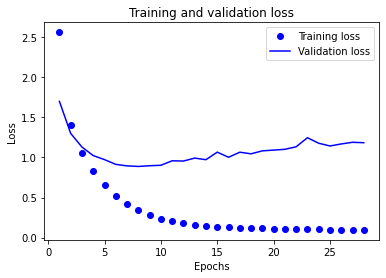

In [20]:
# 에폭별 loss 결과 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

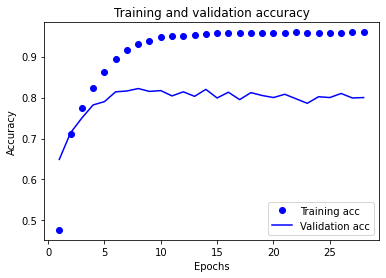

In [21]:
# 에폭별 accuracy(정확도) 결과 시각화
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
# 모델 변경 - 적당한 epochs으로 조정
# 9번째 에포크 이후에 과대적합이 현상이 보임.
# 9번의 에포크로 새로운 모델 훈련과 테스트 세트에서 평가
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_X_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(X_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 73ms/step - loss: 2.5229 - accuracy: 0.5303 - val_loss: 1.6461 - val_accuracy: 0.6550
Epoch 2/9
16/16 [==============================] - 1s 52ms/step - loss: 1.3377 - accuracy: 0.7176 - val_loss: 1.2547 - val_accuracy: 0.7430
Epoch 3/9
16/16 [==============================] - 1s 47ms/step - loss: 0.9871 - accuracy: 0.7919 - val_loss: 1.1319 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.7761 - accuracy: 0.8334 - val_loss: 1.0269 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 1s 49ms/step - loss: 0.6132 - accuracy: 0.8706 - val_loss: 0.9528 - val_accuracy: 0.8090
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.4868 - accuracy: 0.8984 - val_loss: 0.9223 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.3912 - accuracy: 0.9169 - val_loss: 0.9192 - val_accuracy: 0.7970
Epoch 8/9
16/16 [===

In [23]:
results = model.evaluate(X_test, y_test)
print("최종 평가(loss, accuracy) : ", results)

71/71 [==============================] - 0s 6ms/step - loss: 1.0064 - accuracy: 0.7845
최종 평가(loss, accuracy) :  [1.0063812732696533, 0.7845057845115662]


In [24]:
# 모델 학습 후, 테스트 데이터를 사용하여 예측
pred = model.predict(X_test)
pred[0]

array([1.14874383e-04, 8.79586369e-05, 2.48429733e-05, 4.62091416e-01,
       5.17049670e-01, 4.46622871e-05, 2.95120175e-04, 1.02483718e-05,
       2.64090532e-03, 1.24209355e-05, 7.17738003e-04, 1.65853673e-03,
       7.35470894e-05, 1.88086720e-04, 1.04492727e-04, 1.08652341e-04,
       3.48928827e-03, 5.60841116e-04, 1.57302740e-04, 2.61442037e-04,
       7.56962632e-04, 9.32032344e-05, 1.43738143e-05, 2.95619335e-04,
       5.25216728e-06, 3.23657820e-04, 1.00193929e-05, 3.98867880e-04,
       1.97204485e-04, 9.98576288e-04, 7.67585938e-04, 3.40151921e-04,
       1.08196482e-05, 1.62004326e-05, 2.17682085e-04, 1.78156404e-06,
       3.93039547e-03, 1.32018889e-04, 4.95579388e-06, 1.50326022e-03,
       2.00341692e-05, 1.19704193e-04, 6.24691938e-06, 1.33179114e-04,
       4.35129414e-06, 5.80106962e-06], dtype=float32)

In [25]:
# 첫번째 데이터의 확률 분포 확인
pred[0].shape

(46,)

In [26]:
# softmax 활성화 함수 사용 - 46개 뉴런의 예측 확률의 합은 1이 된다(softmax)
np.sum(pred[0])

0.99999994

In [27]:
# 확률이 가장 큰 값이 예측 클래스가 된다.
np.argmax(pred[0])

4

##### 06 다양한 모델(오차함수 변경)

In [28]:
# 정수 레이블(타켓)을 그대로 사용할 때 손실함수를 sparse_categorical_crossentropy 를 사용
y_train = np.array(train_labels)
y_test = np.array(test_labels)

print(y_train.shape)

X_val = X_train[ :1000]
partial_x_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

(8982,)


In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(partial_X_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(X_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 83ms/step - loss: 2.7327 - accuracy: 0.5025 - val_loss: 1.8472 - val_accuracy: 0.5920
Epoch 2/9
16/16 [==============================] - 1s 50ms/step - loss: 1.4903 - accuracy: 0.6872 - val_loss: 1.3518 - val_accuracy: 0.7200
Epoch 3/9
16/16 [==============================] - 1s 47ms/step - loss: 1.0946 - accuracy: 0.7679 - val_loss: 1.1519 - val_accuracy: 0.7450
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8726 - accuracy: 0.8092 - val_loss: 1.0512 - val_accuracy: 0.7690
Epoch 5/9
16/16 [==============================] - 1s 50ms/step - loss: 0.7020 - accuracy: 0.8522 - val_loss: 0.9791 - val_accuracy: 0.7910
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5706 - accuracy: 0.8824 - val_loss: 0.9236 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 1s 68ms/step - loss: 0.4639 - accuracy: 0.9049 - val_loss: 0.9852 - val_accuracy: 0.7920
Epoch 8/9
16/16 [===

In [30]:
results = model.evaluate(X_test, y_test)
print("최종 평가(loss, accuracy) : ", results)

71/71 [==============================] - 0s 3ms/step - loss: 1.0254 - accuracy: 0.7694
최종 평가(loss, accuracy) :  [1.02540123462677, 0.7693677544593811]


##### 08 다양한 모델(은닉층 뉴런이 많이 작을 경우) 충분히 큰 중간층을 두기

In [32]:
# 출력층이 46차원이다. 중간층의 히든 유닛이 46개보다 적으면 안된다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [33]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print( partial_x_train.shape, partial_y_train.shape )

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

results = model.evaluate(X_test, y_test)
print("최종 평가(loss, accuracy) : ", results)

(7982, 10000) (7982,)
Epoch 1/20
16/16 [==============================] - 2s 58ms/step - loss: 2.4547 - accuracy: 0.5193 - val_loss: 1.6451 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.3850 - accuracy: 0.6961 - val_loss: 1.3057 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0474 - accuracy: 0.7660 - val_loss: 1.1118 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8144 - accuracy: 0.8231 - val_loss: 1.0019 - val_accuracy: 0.7950
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6378 - accuracy: 0.8685 - val_loss: 0.9466 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4974 - accuracy: 0.9009 - val_loss: 0.8993 - val_accuracy: 0.8170
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.3991 - accuracy: 0.9196 - val_loss: 0.8899 - val_accuracy

In [34]:
# 46차원보다 훨씬 작은 중간층(예를 들어 4차원)을 두면,
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

results = model.evaluate(X_test, y_test)
print("최종 평가(loss, accuracy) : ", results)

Epoch 1/20
16/16 [==============================] - 2s 71ms/step - loss: 3.4644 - accuracy: 0.1136 - val_loss: 3.1088 - val_accuracy: 0.2180
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 2.8369 - accuracy: 0.2373 - val_loss: 2.6194 - val_accuracy: 0.2780
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 2.3318 - accuracy: 0.4868 - val_loss: 2.1886 - val_accuracy: 0.5760
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 1.8967 - accuracy: 0.6052 - val_loss: 1.8501 - val_accuracy: 0.5890
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 1.5847 - accuracy: 0.6209 - val_loss: 1.6382 - val_accuracy: 0.6010
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 1.3898 - accuracy: 0.6353 - val_loss: 1.5319 - val_accuracy: 0.6150
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 1.2574 - accuracy: 0.6744 - val_loss: 1.4669 - val_accuracy: 0.6460
Epoch 8/20
16

In [35]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)       # 데이터 섞기

float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18388245770258238